# Lesson 1 - Sources and Sinks

### The math

---

OK, let's get down some mathematics. First, from your undergraduate fluid mechanics, you should remember the definition of *circulation*:

$$\Gamma = \oint \mathbf{v}\cdot d\vec{l}$$

In words, the circulation is the line integral of velocity around a closed contour. Squeeze your brain and extract the theorem of Stokes. It says that this line integral is equal to the *flux* through the contour of the *curl* of velocity … which is the vorticity, $\omega=\nabla\times\mathbf{v}$:

$$\oint \mathbf{v}\cdot d\vec{l} = \int \int_s \omega\cdot \vec{n}~ ds$$

If the vorticity is zero (irrotational flow), so is the circulation around any closed contour equal to zero. This means that the line integral of velocity for any curve going from A to B must be equal and opposite to that of any curve going back from B to A. Expand the dot product in the integral, where the velocity is $\mathbf{v}=(u,v,w)$ :

$$\int_A^B \mathbf{v}\cdot d\vec{l} = \int_A^B u~dx + v~dy + w~dz$$

In irrotational flow, it doesn't matter what path you take, this line integral from A to B is always the same value. Now, if you remember your vector calculus, this means that $u~dx + v~dy + w~dz~$ is an [exact differential](http://www.wolframalpha.com/input/?i=exact+differential) of a potential $\phi$, where

$$u=\frac{\partial \phi}{\partial x}, \quad v=\frac{\partial \phi}{\partial y}, \quad w=\frac{\partial \phi}{\partial z}$$

Or, for short: $\mathbf{v}=\nabla \phi$. Applying the continuity equation for incompressible flow, $\nabla\cdot\mathbf{v}=0$, we get the beautifully simple governing equation of potential flow:

$$\nabla^2\phi=0$$

*Laplace's equation!* So any solution to Laplace can be a potential flow, and here we go.

# First Coding Example

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining an evenly spaced cartesian grid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)

print('x= ', x)
print('y= ', y)

X, Y = np.meshgrid(x,y)

x=  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y=  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26

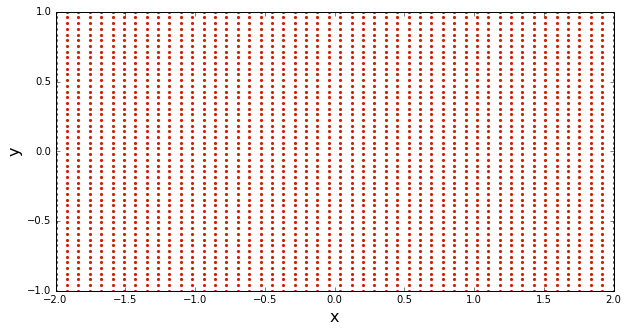

In [3]:
%matplotlib inline

# plot the grid of points
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X, Y, s=10, color='#CD2305', marker='o', linewidth=0);

# Source Flow

We will now calculate the velocity vectors on the grid

## Some math

Cylindrical coordinates, $(r, \theta)$

$$u_r\left(r, \theta\right) = \frac{\sigma}{2\pi r} \text{,} \qquad u_\theta\left(r, \theta\right) = 0$$

$$\sigma = \text{source strength}$$

stream function $\psi$:

$$\frac{1}{r}\frac{\partial\psi}{\partial\theta} = u_r \quad \text{,} \quad -\frac{\partial\psi}{\partial r} = u_\theta$$

This integrates to:

$$\psi = \frac{\sigma}{2\pi}\sigma + constant$$

Cartesian Coordinates:

$$u = \frac{\partial\psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x - x_\text{source}}{\left(x - x_\text{source}\right)^2 + \left(y - y_\text{source}\right)^2}$$

$$v = -\frac{\partial\psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y - y_\text{source}}{\left(x - x_\text{source}\right)^2 + \left(y - y_\text{source}\right)^2}$$

## Code:

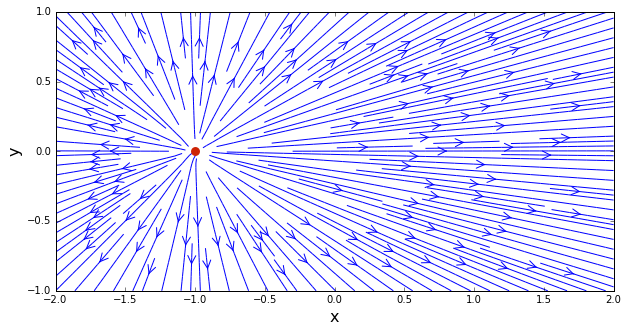

In [4]:
strength_source = 5.0    # source strength
x_source, y_source = -1.0, 0.0    # source location

# compute the velocity field on the meshgrid
u_source = (strength_source)/(2*math.pi)*(X - x_source)/((X - x_source)**2 + (Y - y_source)**2)
v_source = (strength_source)/(2*math.pi)*(Y - y_source)/((X - x_source)**2 + (Y - y_source)**2)

# plot the streamlines
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X,Y,u_source,v_source,density=2,linewidth=1,arrowsize=2,arrowstyle='->')
plt.scatter(x_source,y_source,s=80,color='#CD2305',marker='o',linewidth=0);

*Challenge question*

What is the total mass flux outwards of a small closed surface around the source?

*Answer*

$$\dot{m}_\text{out} = A\rho u_r = \left(4\pi\rho r^2\right) * \left(\frac{\sigma}{2\pi r}\right) = 2\sigma\rho r$$

# Sink Flow

When $\sigma$ is negative, the source is a *sink*.  Streamlines converge to a single point.

This is an example with sink at $\left(1,0\right)$

## Code:

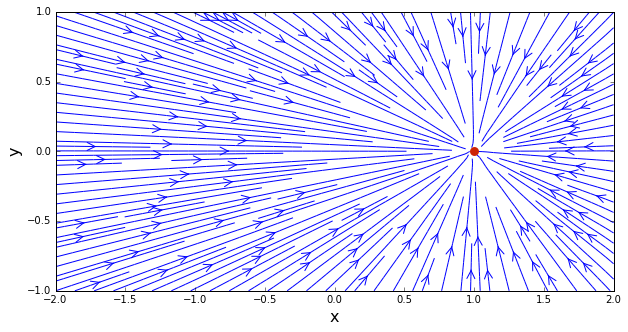

In [5]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

# compute the velocity on the meshgrid
u_sink = strength_sink/(2*math.pi)*(X - x_sink)/((X - x_sink)**2 + (Y - y_sink)**2)
v_sink = strength_sink/(2*math.pi)*(Y - y_sink)/((X - x_sink)**2 + (Y - y_sink)**2)

# plot the streamlines
plt.figure(figsize = (size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X,Y,u_sink,v_sink,density=2,linewidth=1,arrowsize=2,arrowstyle='->')
plt.scatter(x_sink,y_sink,color='#CD2305',s=80,marker='o',linewidth=0);

# Source - sink pair

Use the principle of *superposition*

## Code:

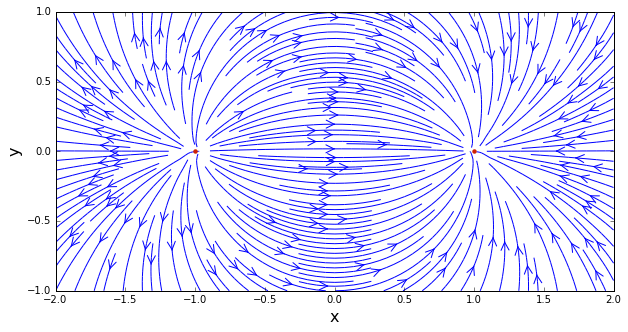

In [6]:
u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the paired velocity vectors on the meshgrid
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X,Y,u_pair,v_pair,density=2.0,linewidth=1,arrowsize=2,arrowstyle='->')
plt.scatter([x_source, x_sink],[y_source, y_sink],color='#CD2305',marker='o',linewidth=0);

# Challenge task

Plot the potential lines instead

## Code:

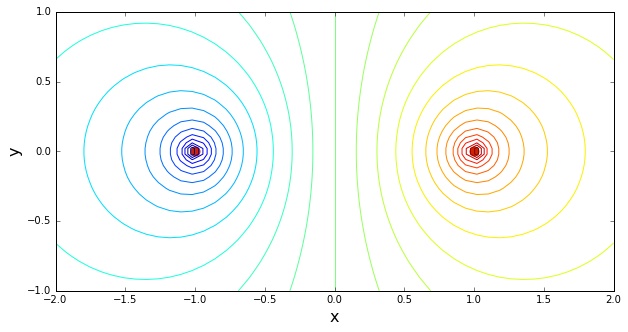

In [7]:
phi_source= strength_source/(4*math.pi)*np.log((X - x_source)**2 + (Y - y_source)**2)
phi_sink = strength_sink/(4*math.pi)*np.log((X - x_sink)**2 + (Y- y_sink)**2)
phi = phi_source + phi_sink

plt.figure(figsize = (size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contour(X,Y,phi,30)
plt.scatter([x_source, x_sink],[y_source,y_sink],color='#CD2305',marker='o', s=80);